<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1>DS102 Project</h1>
<br>
<div> Members: Yao Quan, Reynold and Guan You </div>



<h2> Content page </h2>

- 1. [Importing and cleaning data](#1)
- 2. [Effect of movie budget on profit (Without outliers)](#2)
- 3. [Effect of movie budget on profit (With outliers)](#3)
- 4. [Effect on movie runtime on profit (Outliers included)](#4)
- 5. [Effect on movie genres on profit (Outliers included)](#5)
- 6. [Predicting the profit of a film based on its budget, genre and runtime (Outliers included) - Multivariate analysis](#6)


<a id='1'> <h1><font color="salmon"> 1. Importing and cleaning data </font></h1> </a>

In [120]:
# Import datasets into jupyter notebook

import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [121]:
# Ignore warning messages

import warnings
warnings.filterwarnings('ignore')

In [122]:
# Count number of null values in dataset

train_df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [123]:
# Filter out the relevant columns: variables which we are likely interested to analyze.

col_names = ['budget','genres','original_language','popularity','release_date','runtime','revenue']
train_df_rel = train_df[col_names]
train_df_rel = train_df_rel.dropna() # Drop all NaN values
train_df_rel.head()

,budget,genres,original_language,popularity,release_date,runtime,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2/20/15,93.0,12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,8/6/04,113.0,95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,10/10/14,105.0,13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,3/9/12,122.0,16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,2/5/09,118.0,3923970


In [124]:
# Filter out movies with 0 budget

# Get number of movies with 0 budget using .shape

train_df_rel[train_df_rel['budget'] == 0].shape

(809, 7)

In [125]:
# Only get relevant movies with positive budgets by removing movies with 0 budget

train_df_rel = train_df_rel[train_df_rel['budget'] != 0]
train_df_rel.head()

,budget,genres,original_language,popularity,release_date,runtime,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2/20/15,93.0,12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,8/6/04,113.0,95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,10/10/14,105.0,13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,3/9/12,122.0,16000000
5,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,0.743274,8/6/87,83.0,3261638


In [126]:
# Create columns for profit and profit margin

train_df_rel['profit'] = train_df_rel['revenue'] - train_df_rel['budget']
train_df_rel['profit margin'] = train_df_rel['profit'] / train_df_rel ['revenue'] * 100
train_df_rel.head()

,budget,genres,original_language,popularity,release_date,runtime,revenue,profit,profit margin
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2/20/15,93.0,12314651,-1685349,-13.685723
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,8/6/04,113.0,95149435,55149435,57.960864
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,10/10/14,105.0,13092000,9792000,74.793767
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,3/9/12,122.0,16000000,14800000,92.500000
5,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,0.743274,8/6/87,83.0,3261638,-4738362,-145.275533


In [127]:
# Check type of data in 'release_date'

type(train_df_rel['release_date'][0])

str

In [128]:
# Create function to extract year from release_date 

def year_extractor(release_date):
    last_2_digits = release_date[-2:]

    if int(last_2_digits) < 19 :
        release_year = '20' + last_2_digits
        
    elif int(last_2_digits) >= 19 :
        release_year = '19' + last_2_digits
        
    return release_year

In [129]:
# Apply function created above to extract year and create new column "release_year"

train_df_rel['release_year'] = train_df_rel['release_date'].apply(year_extractor)
train_df_rel.head()

# Note: We assume there are no films earlier than 1921

,budget,genres,original_language,popularity,release_date,runtime,revenue,profit,profit margin,release_year
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2/20/15,93.0,12314651,-1685349,-13.685723,2015
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,8/6/04,113.0,95149435,55149435,57.960864,2004
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,10/10/14,105.0,13092000,9792000,74.793767,2014
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,3/9/12,122.0,16000000,14800000,92.500000,2012
5,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,0.743274,8/6/87,83.0,3261638,-4738362,-145.275533,1987


In [165]:
# Create correlation matrix
outliers_df_corr = outliers_df.corr()

outliers_df_corr_stylised = outliers_df_corr.style.background_gradient(cmap='coolwarm')
outliers_df_corr_stylised

,budget,popularity,runtime,revenue,profit,profit margin
budget,1,0.16254,0.334117,0.668503,0.474816,-0.525417
popularity,0.16254,1,0.172271,0.31979,0.327023,0.0325997
runtime,0.334117,0.172271,1,0.381931,0.346295,-0.0792659
revenue,0.668503,0.31979,0.381931,1,0.971944,0.0529763
profit,0.474816,0.327023,0.346295,0.971944,1,0.228865
profit margin,-0.525417,0.0325997,-0.0792659,0.0529763,0.228865,1


In [166]:
# Note that popularity refers to post-release popularity.
# Ignoring revenue and popularity, there is some correlation between budget and profit, as well as between runtime and profit.
# We decide to analyze the relationship between film budget and profits, and between runtime and profits.
# We are also interested to see the relationship between a film's genre and its profits.

In [130]:
# Get interquartile range for profit and get outliers_df, the dataframe that excludes outliers

q1 = train_df_rel['profit'].quantile(q = 0.25)
q3 = train_df_rel['profit'].quantile(q = 0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
outliers_df = train_df_rel[~train_df_rel['profit'].between(lb, ub)]
outliers_df.describe()

,budget,popularity,runtime,revenue,profit,profit margin
count,2.240000e+02,224.000000,224.000000,2.240000e+02,2.240000e+02,224.000000
mean,9.072030e+07,22.844609,119.174107,4.441326e+08,3.534123e+08,79.031943
std,6.912165e+07,37.479012,22.305081,2.586280e+08,2.185518e+08,17.637043
min,1.500000e+04,0.452934,81.000000,9.002429e+07,-1.074474e+08,-119.353767
25%,3.700000e+07,11.452171,103.000000,2.640687e+08,2.076657e+08,72.359068
50%,7.500000e+07,14.156581,118.000000,3.565636e+08,2.743071e+08,81.076420
75%,1.305000e+08,20.188532,133.250000,5.321364e+08,4.205220e+08,88.619457
max,3.800000e+08,294.337037,187.000000,1.519558e+09,1.316249e+09,99.992242


<a id='2'> <h1> <font color="salmon"> 2. Effect of movie budget on profit (Without outliers) </font> </h1> </a>

The coefficient of the linear regression line is  1.5012937438195635
The y-intercept of the linear regression line is  217214534.47469968
The r squared value is 0.22545037113389377


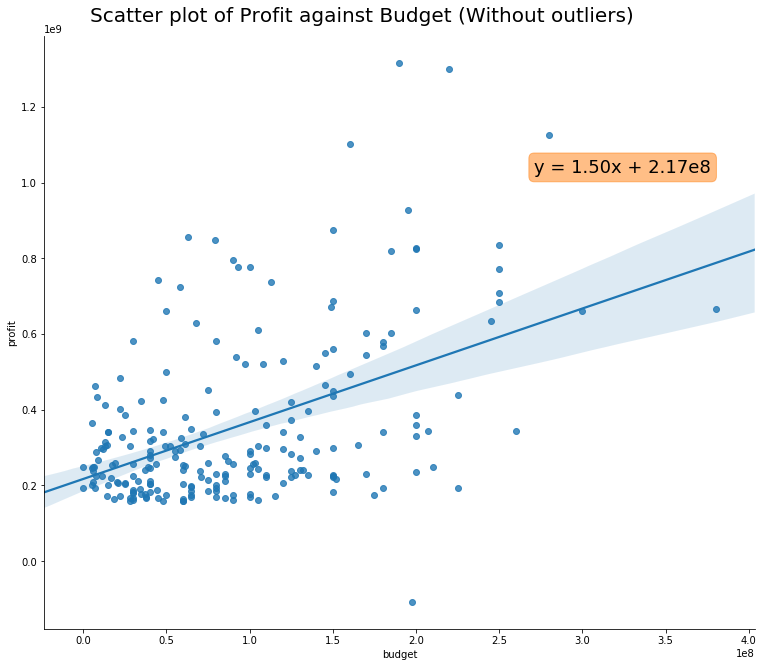

In [131]:
# Analyse relationship between budget and profit margin using linear regression

from sklearn import datasets, linear_model

# fit_intercept is True if we don't force the intercept to be 0, and False if we force the intercept to be 0
regr = linear_model.LinearRegression(fit_intercept = True)

x = outliers_df[['budget']]
y = outliers_df[['profit']]

regr.fit(x,y)

# Visualise regression fit as a scatter plot
import seaborn as sns

ax = sns.lmplot(x = 'budget', y = 'profit', data = outliers_df)
fig = ax.fig
fig.suptitle('Scatter plot of Profit against Budget (Without outliers)', fontsize = 20)
fig.set_size_inches(12, 10)

props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[1])
textstr = 'y = 1.50x + 2.17e8'
fig.text(0.7, 0.75, textstr, fontsize=18, bbox=props)

# Calculate coefficient and intercept of linear regression line

reg_coeff = float(regr.coef_)
reg_intercept = float(regr.intercept_)

print('The coefficient of the linear regression line is ', reg_coeff)
print('The y-intercept of the linear regression line is ', reg_intercept)

# Calculate R square value
from sklearn.metrics import r2_score

fitted_values = regr.predict(x)
print('The r squared value is', r2_score(y,fitted_values))

In [ ]:
# There is a positive linear relationship between film budget and profit, with a coefficient of 1.50.

In [132]:
# Predict revenue using a custom budget

custom_budget = 100 
predicted_revenue = float(regr.predict([[custom_budget]]))

print('If the budget spent is', custom_budget, 'the predicted revenue is', predicted_revenue)

If the budget spent is 100 the predicted revenue is 217214684.60407406


<a id='3'> <h1> <font color="salmon"> 3. Effect of movie budget on profit (With outliers) </font></h1> </a>

The coefficient of the linear regression line is  1.8567050234138103
The y-intercept of the linear regression line is  -1277763.4901372716
The r squared value is 0.33777751194031935


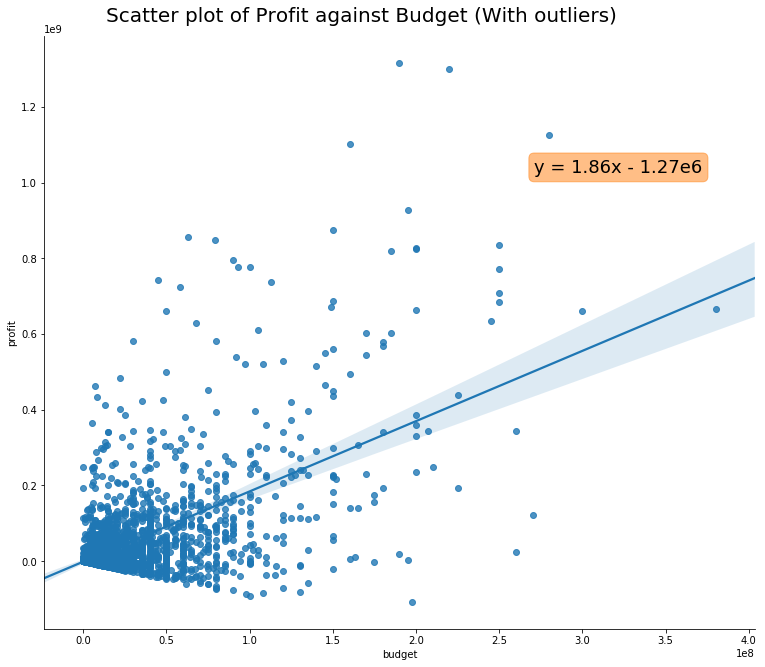

In [135]:
# Include outliers
# Analyse relation of budget and profit 
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression(fit_intercept = True)

x = train_df_rel[['budget']]
y = train_df_rel[['profit']]

regr.fit(x,y)

# Visualise regression fit as a scatter plot
import seaborn as sns

ax2 = sns.lmplot(x = 'budget', y = 'profit', data = train_df_rel)
fig = ax2.fig
fig.suptitle('Scatter plot of Profit against Budget (With outliers)', fontsize = 20)
fig.set_size_inches(12, 10)

props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[1])
textstr = 'y = 1.86x - 1.27e6'
fig.text(0.7, 0.75, textstr, fontsize=18, bbox=props)


# Calculate coefficient and y-intercept of linear regression line
reg_coeff = float(regr.coef_)
reg_intercept = float(regr.intercept_)

print('The coefficient of the linear regression line is ', reg_coeff)
print('The y-intercept of the linear regression line is ', reg_intercept)
 

# Calculate R square value
fitted_values = regr.predict(x)
print('The r squared value is', r2_score(y,fitted_values))

In [ ]:
# There is a positive linear relationship between film budget and profit, with a coefficient of 1.86.

In [136]:
# Predict revenue using a custom budget

custom_budget = 100 
predicted_revenue = float(regr.predict([[custom_budget]]))

print('If the budget spent is', custom_budget, 'the predicted revenue is', predicted_revenue)

If the budget spent is 100 the predicted revenue is -1277577.8196349302


In [137]:
# Create correlation matrix
train_df_rel_corr = train_df_rel.corr()

train_df_rel_corr_stylised = train_df_rel_corr.style.background_gradient(cmap='coolwarm')
train_df_rel_corr_stylised

,budget,popularity,runtime,revenue,profit,profit margin
budget,1,0.309926,0.220434,0.739588,0.581186,0.0192299
popularity,0.309926,1,0.116303,0.44396,0.439761,0.0175461
runtime,0.220434,0.116303,1,0.2075,0.18188,0.0270466
revenue,0.739588,0.44396,0.2075,1,0.977555,0.0264345
profit,0.581186,0.439761,0.18188,0.977555,1,0.0259415
profit margin,0.0192299,0.0175461,0.0270466,0.0264345,0.0259415,1


<a id='4'> <h1> <font color="salmon"> 4. Effect on movie runtime on profit (Outliers included)</font> </h1> </a>

The coefficient of the linear regression line is  1043253.7195288348
The y-intercept of the linear regression line is  -58600895.7144637
The r squared value is 0.033080392052255325


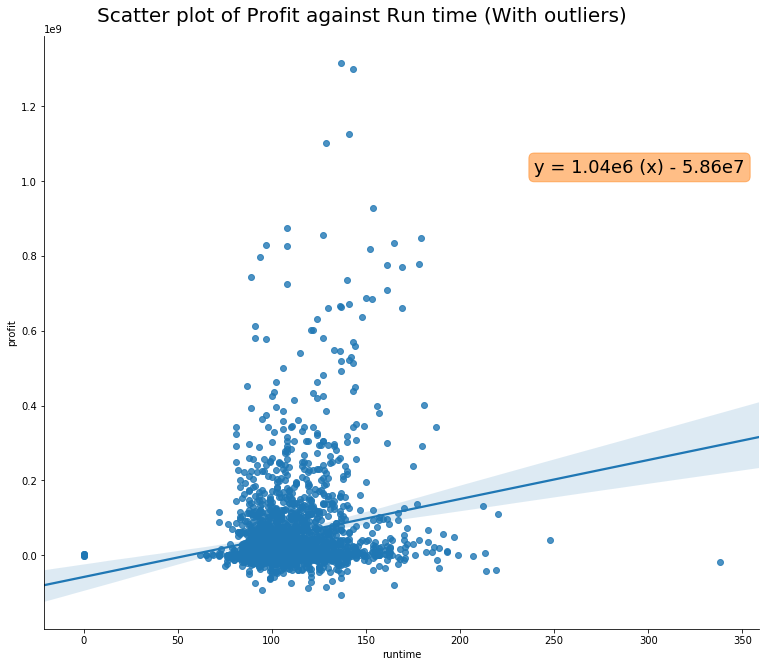

In [138]:
# Analyse film profit based on runtime
# Include outliers
# Analyse relationship between film runtime and profit 

regr = linear_model.LinearRegression(fit_intercept = True)

x = train_df_rel[['runtime']]
y = train_df_rel[['profit']]

regr.fit(x,y)

# Visualise regression fit as a scatter plot
import seaborn as sns

ax3 = sns.lmplot(x = 'runtime', y = 'profit', data = train_df_rel)
fig = ax3.fig
fig.suptitle('Scatter plot of Profit against Run time (With outliers)', fontsize = 20)
fig.set_size_inches(12, 10)

props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[1])
textstr = 'y = 1.04e6 (x) - 5.86e7'
fig.text(0.7, 0.75, textstr, fontsize=18, bbox=props)

# Calculate coefficient and y-intercept of linear regression line
reg_coeff = float(regr.coef_)
reg_intercept = float(regr.intercept_)

print('The coefficient of the linear regression line is ', reg_coeff)
print('The y-intercept of the linear regression line is ', reg_intercept)

# Predict 
regr.predict([[100]]) 

# Calculate R square value
fitted_values = regr.predict(x)
print('The r squared value is', r2_score(y,fitted_values))

In [ ]:
# There is a positive linear relationship between runtime and profit. 
# But there seems to be a lot of noise based on the scatter plot.

In [139]:
# Predict revenue using a custom run time of 100 min.

custom_runtime = 100 
predicted_revenue = float(regr.predict([[custom_runtime]]))

print('If the movie runtime is', custom_runtime, 'the predicted revenue is', predicted_revenue)

If the movie runtime is 100 the predicted revenue is 45724476.23841978


In [141]:
# We now want to group movie runtimes into 10-min intervals and place them into different bins.
# The analysis will help to reduce noise.
# Also, suppose we want to predict films according to their runtime.
# We think it is too arbitary for two films with a minute difference in runtime to have significantly different predicted profits.

bins = range(0,350,10)
train_df_rel['runtime_bins'] = pd.cut(train_df_rel['runtime'], bins)
grouped_df = train_df_rel.groupby('runtime_bins')

mean_grouped_df = grouped_df.mean()
cleaned_df = mean_grouped_df['profit'].dropna()

train_df_rel.head()

,budget,genres,original_language,popularity,release_date,runtime,revenue,profit,profit margin,release_year,runtime_bins
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2/20/15,93.0,12314651,-1685349,-13.685723,2015,"(90, 100]"
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,8/6/04,113.0,95149435,55149435,57.960864,2004,"(110, 120]"
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,10/10/14,105.0,13092000,9792000,74.793767,2014,"(100, 110]"
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,3/9/12,122.0,16000000,14800000,92.500000,2012,"(120, 130]"
5,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,0.743274,8/6/87,83.0,3261638,-4738362,-145.275533,1987,"(80, 90]"


Text(0.5,1,'Bar chart of Profit against Runtime intervals')

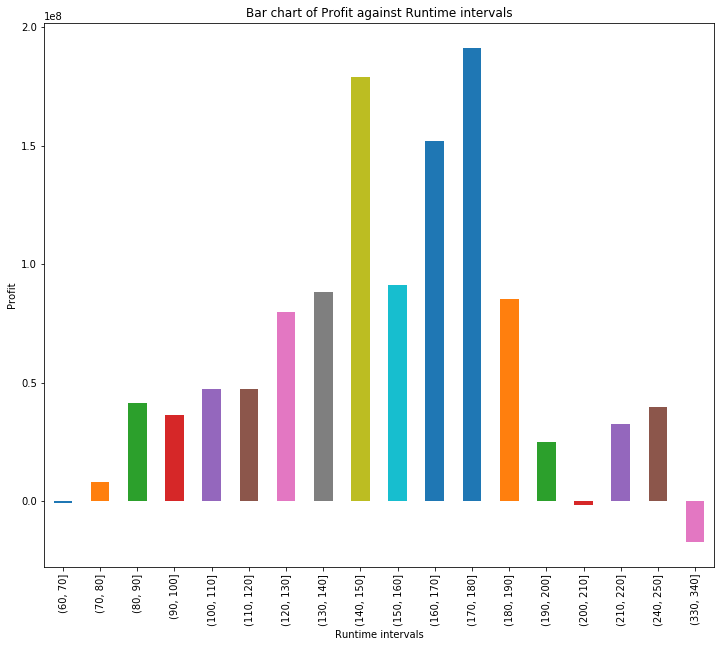

In [142]:
# Visualise average profit of films in each runtime bin as bar chart.

ax4 = cleaned_df.plot(kind='bar',
                x='runtime',
                y='profit',
                figsize=(12,10))

ax4.set_xlabel('Runtime intervals')
ax4.set_ylabel('Profit')
ax4.set_title('Bar chart of Profit against Runtime intervals')

In [ ]:
# Films in the (140,150], (160,170] and (170,180] bins have the highest profits.

In [143]:
# We add the bins as binary variables to the dataset (to be included in the machine learning model later).

runtime_dummies_unique_set = set(train_df_rel['runtime_bins'].dropna().tolist())
runtime_dummies_unique = list(runtime_dummies_unique_set)
runtime_dummies_unique.sort()
runtime_dummies = pd.get_dummies(train_df_rel['runtime_bins'],
                              columns = runtime_dummies_unique)

In [144]:
train_df_rel = pd.concat([train_df_rel,runtime_dummies], axis=1)
train_df_rel.head()

,budget,genres,original_language,popularity,release_date,runtime,revenue,profit,profit margin,release_year,...,"(240, 250]","(250, 260]","(260, 270]","(270, 280]","(280, 290]","(290, 300]","(300, 310]","(310, 320]","(320, 330]","(330, 340]"
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2/20/15,93.0,12314651,-1685349,-13.685723,2015,...,0,0,0,0,0,0,0,0,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,8/6/04,113.0,95149435,55149435,57.960864,2004,...,0,0,0,0,0,0,0,0,0,0
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,10/10/14,105.0,13092000,9792000,74.793767,2014,...,0,0,0,0,0,0,0,0,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,3/9/12,122.0,16000000,14800000,92.500000,2012,...,0,0,0,0,0,0,0,0,0,0
5,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,0.743274,8/6/87,83.0,3261638,-4738362,-145.275533,1987,...,0,0,0,0,0,0,0,0,0,0


<a id='5'> <h1> <font color="salmon"> 5. Effect on movie genres on profit (Outliers included)</font></h1> </a>

In [145]:
# Obtain list of unique of genres in entire database

unique_genres = set()

for row in train_df_rel["genres"]:
    film_genres = []
    i=0
    for n in range(str(row).count("}")):
        row_cut = row[i:len(row)]
        start = row_cut.find("name", )+8
        end = row_cut.find("}")
        g = row_cut[start:end-1]
        film_genres.append(g)
        i +=end +1
        unique_genres.add(g)
print(unique_genres)

{'Adventure', 'Animation', 'Science Fiction', 'Horror', 'Western', 'Foreign', 'Music', 'TV Movie', 'Documentary', 'Comedy', 'War', 'Family', 'Action', 'Mystery', 'Romance', 'Drama', 'History', 'Thriller', 'Crime', 'Fantasy'}


In [146]:
#How many different genres are there?

print("There are " + str(len(unique_genres)) + " different genres.")

There are 20 different genres.


In [147]:
# To obtain the binary variables for each genre

for a in list(unique_genres):
    def convert(n):
        if str(a) in str(n):
            return 1
        else:
            return 0
    name = str(a)
    train_df_rel[name] = train_df_rel["genres"].apply(convert)

In [148]:
# Preview dataframe with newly added columns

train_df_rel.head()

,budget,genres,original_language,popularity,release_date,runtime,revenue,profit,profit margin,release_year,...,War,Family,Action,Mystery,Romance,Drama,History,Thriller,Crime,Fantasy
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2/20/15,93.0,12314651,-1685349,-13.685723,2015,...,0,0,0,0,0,0,0,0,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,8/6/04,113.0,95149435,55149435,57.960864,2004,...,0,1,0,0,1,1,0,0,0,0
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,10/10/14,105.0,13092000,9792000,74.793767,2014,...,0,0,0,0,0,1,0,0,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,3/9/12,122.0,16000000,14800000,92.500000,2012,...,0,0,0,0,0,1,0,1,0,0
5,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,0.743274,8/6/87,83.0,3261638,-4738362,-145.275533,1987,...,0,1,0,0,0,0,0,0,0,0


In [149]:
# Include outliers
# Analyse relation of genre to profits 

genre_regr = linear_model.LinearRegression(fit_intercept = True)

x = train_df_rel[list(unique_genres)]
y = train_df_rel[['profit']]

genre_regr.fit(x,y)
[avg_profit] = genre_regr.coef_.tolist()

genre_avg_prof = pd.DataFrame({"Genre": list(unique_genres), "Average profit": avg_profit + genre_regr.intercept_})
genre_avg_prof = genre_avg_prof.sort_values(by ='Average profit')
genre_avg_prof = genre_avg_prof.reset_index()
genre_avg_prof

,index,Genre,Average profit
0,7,TV Movie,-1.314287e+07
1,8,Documentary,1.843796e+07
2,4,Western,2.397704e+07
3,5,Foreign,2.451237e+07
4,16,History,3.263090e+07
5,10,War,3.366396e+07
6,15,Drama,3.713832e+07
7,9,Comedy,4.308251e+07
8,6,Music,4.794140e+07
9,17,Thriller,4.918233e+07


Text(0.5,1,'Bar chart of Average Profit for each Genre')

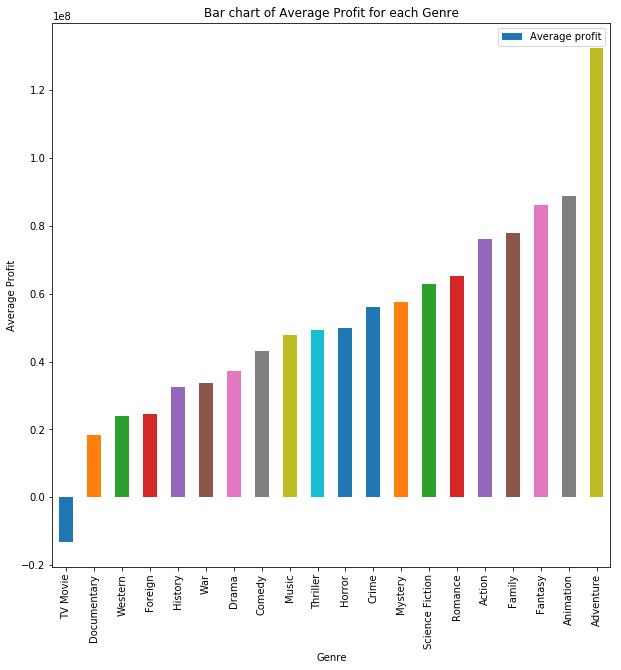

In [150]:
# Visualise genre data as bar chart

ax5 = genre_avg_prof.plot(kind='bar',
                x='Genre',
                y='Average profit',
                figsize=(10,10))

ax5.set_xlabel('Genre')
ax5.set_ylabel('Average Profit')
ax5.set_title('Bar chart of Average Profit for each Genre')

In [ ]:
# Adventure films gross the highest profits, while TV Movies seem to be making a loss on average.

In [151]:
# Calculate R square value

fitted_values = genre_regr.predict(x)
print(r2_score(y,fitted_values))

0.11441698288947222


In [152]:
# Calculate R square value

fitted_values = genre_regr.predict(x)
print(r2_score(y,fitted_values))

0.11441698288947222


<a id='6'> <h1> <font color="salmon"> 6. Predicting the profit of a film based on its budget, genre and runtime (Outliers included) - Multivariate analysis </font></h1> </a>

In [153]:
# Include outliers
# Analyse relation of genre, runtime, budget to profits 

from sklearn.model_selection import train_test_split

all_x = train_df_rel[['budget'] + list(unique_genres) + list(runtime_dummies_unique)]
all_y = train_df_rel[['profit']]

x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, random_state=42)

In [154]:
# Fit a multivariate linear regression model on the training dataset

profit_predictor = linear_model.LinearRegression()

profit_predictor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
# Take a look at the coefficients of the model

[pdt_profit] = profit_predictor.coef_.tolist()

variables = ["budget"] + list(unique_genres) + list(runtime_dummies_unique)

coefficient_table = pd.DataFrame({"Variable": variables, "Coefficient": pdt_profit})
coefficient_table

,Variable,Coefficient
0,budget,1.541705e+00
1,Adventure,3.187425e+07
2,Animation,3.251907e+07
3,Science Fiction,-1.505946e+07
4,Horror,1.905677e+07
5,Western,-1.470935e+07
6,Foreign,-3.222873e+07
7,Music,-8.236907e+06
8,TV Movie,1.413418e+07
9,Documentary,-9.027749e+06


In [156]:
# Take a look at the intercept of the model

print(profit_predictor.intercept_)

[5411300.51249481]


In [157]:
# Calculate R square value

from sklearn.metrics import r2_score

fitted_values = profit_predictor.predict(x_test) 
print(r2_score(y_test,fitted_values))

0.3962080380686187


In [158]:
# R-square value is not very high.
# This suggests that this is not a highly reliable model for predicting film profit, although it does have some success.

# Comments

**Score (Out of 20):** 19
    
    
**Legend:**

- (+) What I liked
- (/) Note
- (-) Suggestion for Improvement

**Grading**

- Dataset evaluation (Out of 5) - 5
    - (+) Explored many variables available |in the data set
    - (+) Variables were visualized appriopriately
    
    
- Methodology (Out of 10)- 9

    - (+) Cleaned data using drop, dropna, renamed columns, filtering
    - (+) Excellent use of groupby and deep-dive

    
- Insights / evaluation (Out of 5) - 5
    - (+) Insights drawn from analytics
    - (+) Put in thought into analyzing the data set, attempted prediction model